In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [47]:
data = pd.read_csv('/Users/Mac/Downloads/telecom_users.csv')

In [48]:
pandas_profiling.ProfileReport(data) # EDA report

In [49]:
data.drop(['Unnamed: 0'],inplace=True,axis=1) # Removing Unwanted column

In [50]:
cleanup = {"Churn":{'No':0,'Yes':1}} # Replacing data with numerical values
data = data.replace(cleanup)


In [51]:
col = ['OnlineBackup','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity','StreamingTV'] #Cleaning data
for i in col:
    data[i] = data[i].replace({'No Internet Service','No'})

In [52]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan) #Removing Whitepsaces
data.dropna( subset = ['TotalCharges'],inplace = True)
data['TotalCharges'] = data['TotalCharges'].astype(float)


In [53]:
data.shape

(5976, 21)

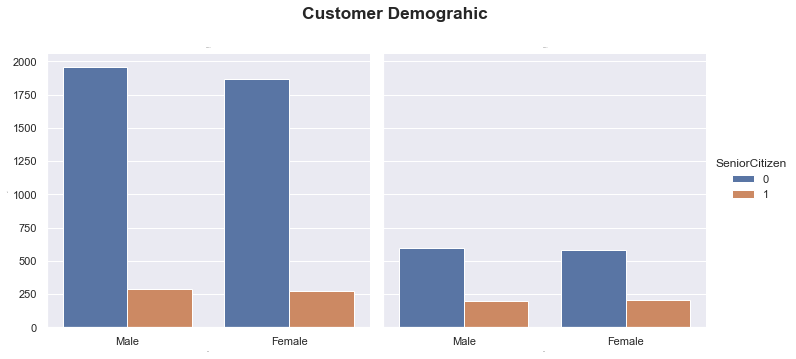

In [81]:
sns.set( rc = {'figure.figsize' : ( 30, 15 ), 
               'axes.labelsize' : 1 })
ax = sns.catplot(x="gender", hue = "SeniorCitizen", col='Churn', data=data, kind = 'count')
ax.fig.suptitle("Customer Demograhic" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
ax.fig.subplots_adjust( top = 0.85 )

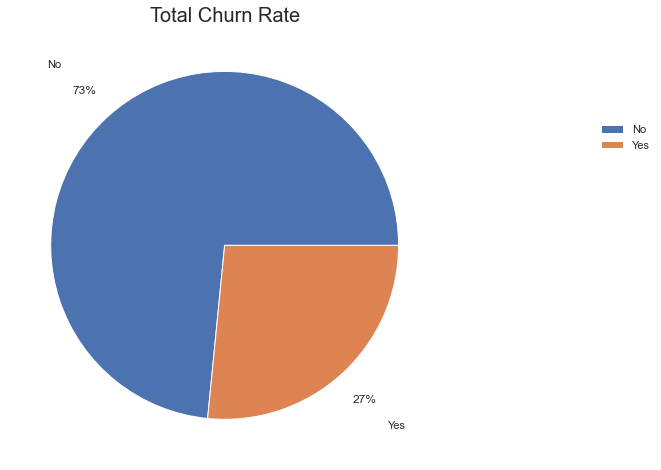

In [55]:
values = [round((data.loc[data.Churn==0,'Churn'].count()/data['Churn'].count())*100,2),
          round((data.loc[data.Churn==1,'Churn'].count()/data['Churn'].count())*100,2)]
labels = ['No','Yes']
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['text.color'] = '#282927'

plt.pie(values, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.title("Total Churn Rate",fontsize=20)
plt.legend(frameon=False, bbox_to_anchor=(1.5,0.8))


Text(0.5, 1.0, 'Churn rate by contract\n')

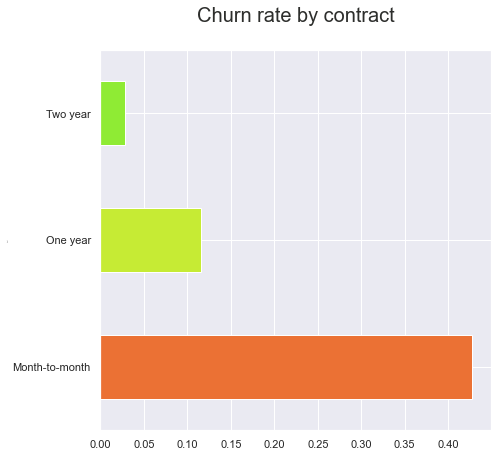

In [56]:
data_contract = data.groupby('Contract').Churn.mean()

plt.figure(figsize=(7, 7))
plt.rcParams['text.color'] = '#2d2e2c'
data_contract.plot.barh(color=['#eb7134', '#c6eb34', '#8feb34'])
plt.title("Churn rate by contract\n",fontsize=20)


    

Text(0.5, 1.0, 'Churn rate by Internet Service\n')

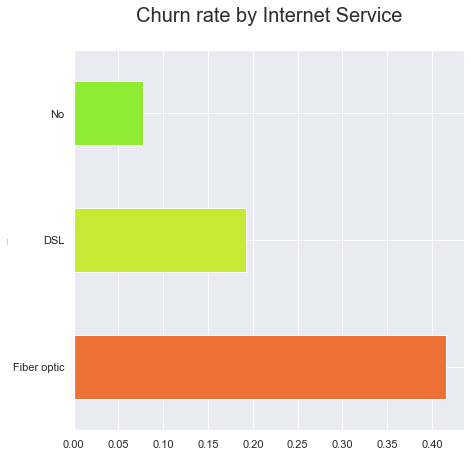

In [57]:
data_inter = data.groupby('InternetService').Churn.mean()
data_inter = data_inter.sort_values(ascending=False)
plt.figure(figsize=(7, 7))
plt.rcParams['text.color'] = '#2d2e2c'
data_inter.plot.barh(color=['#eb7134', '#c6eb34', '#8feb34'])
plt.title("Churn rate by Internet Service\n",fontsize=20)


Text(0.5, 1.0, 'Churn rate by Online Security\n')

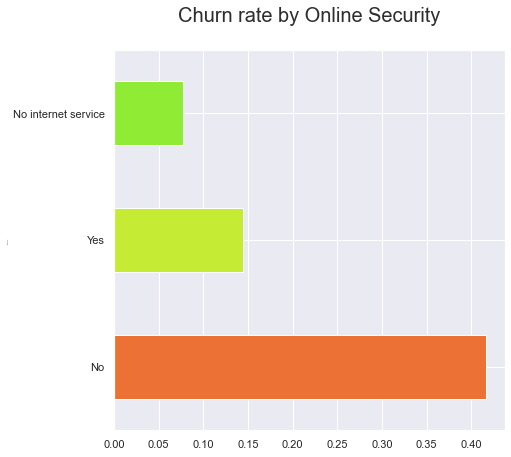

In [58]:
data_online = data.groupby('OnlineSecurity').Churn.mean()
data_online = data_online.sort_values(ascending=False)
plt.figure(figsize=(7, 7))
plt.rcParams['text.color'] = '#2d2e2c'
data_online.plot.barh(color=['#eb7134', '#c6eb34', '#8feb34'])
plt.title("Churn rate by Online Security\n",fontsize=20)

Text(0.5, 1.0, 'Churn rate by Tech support\n')

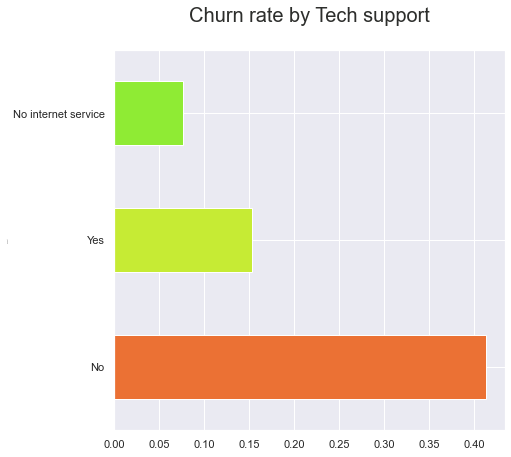

In [59]:
data_tech = data.groupby('TechSupport').Churn.mean()
data_tech = data_tech.sort_values(ascending=False)
plt.figure(figsize=(7, 7))
plt.rcParams['text.color'] = '#2d2e2c'
data_tech.plot.barh(color=['#eb7134', '#c6eb34', '#8feb34'])
plt.title("Churn rate by Tech support\n",fontsize=20)

Text(0.5, 1.0, 'Churn rate by Payment Method \n')

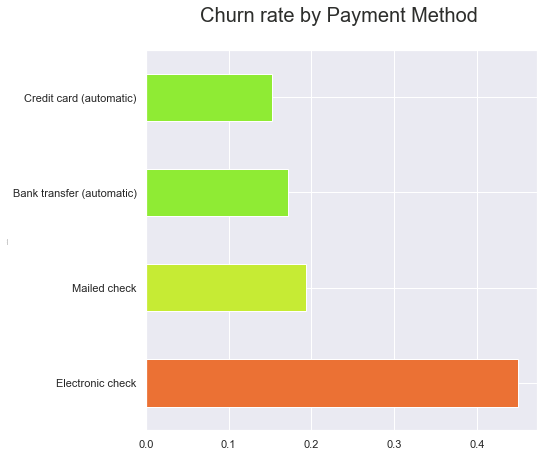

In [60]:
data_pay = data.groupby('PaymentMethod').Churn.mean()
data_pay = data_pay.sort_values(ascending=False)
plt.figure(figsize=(7, 7))
plt.rcParams['text.color'] = '#2d2e2c'
data_pay.plot.barh(color=['#eb7134', '#c6eb34', '#8feb34','#8feb34'])
plt.title("Churn rate by Payment Method \n",fontsize=20)

In [61]:
churn_d = pd.get_dummies(data, columns = ['Contract','Dependents','DeviceProtection','gender',
                                                        'InternetService','MultipleLines','OnlineBackup',
                                                        'OnlineSecurity','PaperlessBilling','Partner',
                                                        'PaymentMethod','PhoneService','SeniorCitizen',
                                                        'StreamingMovies','StreamingTV','TechSupport'],
                              drop_first=True)


In [62]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
colscaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_d[colscaling] = standardScaler.fit_transform(churn_d[colscaling])


In [63]:
churn_d.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes
0,7010-BRBUU,1.611381,-1.353483,-0.247769,0,0,1,1,1,0,...,0,0,1,0,1,0,1,0,1,0
1,9688-YGXVR,0.468468,0.774066,0.736669,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,9286-DOJGF,0.223558,0.335602,0.251453,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,6994-KERXL,-1.164265,-0.297182,-0.905725,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,2181-UAESM,-1.245901,-0.378564,-0.958057,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0


In [68]:
y = churn_d['Churn']
X = churn_d.drop(['Churn','customerID'], axis = 1)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [71]:
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)


pred = logmodel.predict(X_test)


logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

In [72]:
logmodel_accuracy

80.03

In [73]:
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel


array([[1190,  140],
       [ 218,  245]])

In [74]:
churn_d['Probability_of_Churn'] = logmodel.predict_proba(churn_d[X_test.columns])[:,1]
churn_d[['customerID','Probability_of_Churn']].head()


,customerID,Probability_of_Churn
0,7010-BRBUU,0.001651
1,9688-YGXVR,0.281503
2,9286-DOJGF,0.436845
3,6994-KERXL,0.560838
4,2181-UAESM,0.307558


In [77]:
customers_high = churn_d[churn_d['Probability_of_Churn']>=0.8]
customers_high[['customerID','Probability_of_Churn']]

,customerID,Probability_of_Churn
49,9300-AGZNL,0.841309
52,7216-EWTRS,0.837827
427,3158-MOERK,0.811180
1238,2660-EMUBI,0.803179
1558,3049-SOLAY,0.812132
1569,8884-ADFVN,0.817554
1589,1415-YFWLT,0.809611
1988,5150-ITWWB,0.836451
2044,4424-TKOPW,0.838089
2190,8149-RSOUN,0.816370
